In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load data

books_df = pd.read_csv('/Users/amandashaffner/Desktop/books.csv')

ratings_df = pd.read_csv('/Users/amandashaffner/Desktop/ratings.csv')

users_df = pd.read_csv('/Users/amandashaffner/Desktop/users.csv')

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
#Check for null values

print('Null values in books_df: \n', books_df.isnull().sum())
print('Null values in ratings_df: \n', ratings_df.isnull().sum())
print('Null values in users_df: \n', users_df.isnull().sum())

Null values in books_df: 
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Null values in ratings_df: 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Null values in users_df: 
 User-ID          0
Location         0
Age         110762
dtype: int64


In [10]:
#number of unique values 

print('Unique values in books_df: \n', books_df.nunique())
print('Unique values in ratings_df: \n', ratings_df.nunique())
print('Unique values in users_df: \n', users_df.nunique())

Unique values in books_df: 
 ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
Unique values in ratings_df: 
 User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64
Unique values in users_df: 
 User-ID     278858
Location     57339
Age            165
dtype: int64


In [11]:
# Print all values that cannot be converted to int for publishing year and ISBN
for column_name in ["Year-Of-Publication", "ISBN"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in books_df[column_name]:
        try:
            int(value)

        except:
            print(value)


These are the problematic values for the variable: Year-Of-Publication
DK Publishing Inc
Gallimard
DK Publishing Inc
These are the problematic values for the variable: ISBN
074322678X
080652121X
038078243X
055321215X
067176537X
042518630X
042511774X
087113375X
067976397X
038572179X
044651747X
039575514X
342311360X
038076654X
051513290X
140003180X
155874262X
006102063X
006052779X
034543191X
037582345X
156971620X
044023722X
038081840X
055329198X
067153484X
038542471X
067103619X
076218857X
156718796X
006101351X
039456894X
044021145X
074345829X
055358099X
014023828X
039914739X
051762639X
081296666X
887641486X
080521061X
080213825X
055356451X
084994371X
042517736X
038549825X
067170124X
006017143X
030720152X
193072229X
068484267X
080411952X
006015781X
193156146X
015600710X
225300670X
207053880X
229000510X
052594463X
039304016X
057120354X
185479549X
156341029X
038529929X
039914370X
039457513X
043922165X
015216250X
068983585X
185424597X
349913358X
080901582X
039914563X
067175145X
044661162X
03

In [12]:
books_df.loc[books_df['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Based on the information above when I drop the null values the publication year will be able to be converted to an integers. It looks like there is an extra X, which denotes 10, for many ISBN numbers which is normal. I can consider  changing or replacing any values until data sets are merged. 

In [13]:
#droping null values due to small amount. 
books_df = books_df.dropna()

#droping medium and large verision of book images
to_drop = ['Image-URL-M', 'Image-URL-L']
books_df = books_df.drop(to_drop, axis = 1)

books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

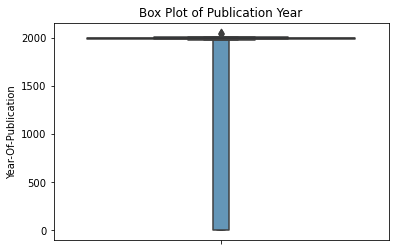

In [14]:
pl=sns.boxenplot(y=books_df["Year-Of-Publication"])
pl.set_title("Box Plot of Publication Year")
plt.show()

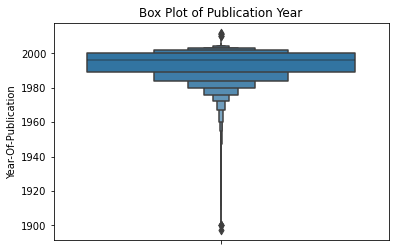

In [15]:
#Removing outliers in publication years. 

books_df = books_df[(books_df["Year-Of-Publication"] > 1850) & (books_df["Year-Of-Publication"] < 2020)]

pl=sns.boxenplot(y=books_df["Year-Of-Publication"])
pl.set_title("Box Plot of Publication Year")
plt.show()

In [16]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [17]:
#filling null values and outliers with mean age. 
users_df["Age"].fillna(round(users_df["Age"].mean()), inplace=True)

users_df["Age"] = users_df["Age"].apply(lambda x: round(users_df["Age"].mean()) if (x > 90) or (x == 0) else x)

users_df["Age"] = users_df["Age"].astype(int)

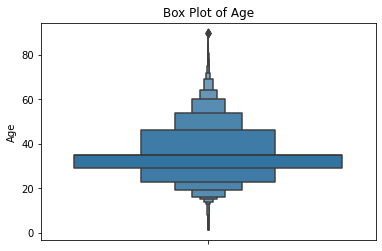

In [18]:
pl=sns.boxenplot(y=users_df["Age"])
pl.set_title("Box Plot of Age")
plt.show()

In [19]:
df=books_df.merge(ratings_df,on="ISBN")
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [20]:
df=df.merge(users_df,on="User-ID")
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",35
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",35
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",35


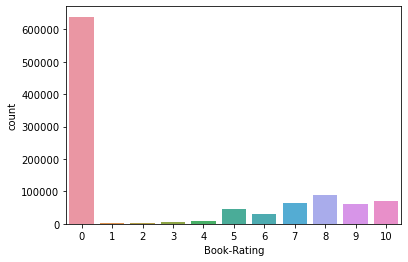

In [21]:
#Visualization of the ratings
sns.countplot(data=df , x='Book-Rating')
plt.show();

It can be observed that many of the ratings are zero, this would include both actual rating of zero and books read and left unrated. Thus, we will look at the ratings from 1 - 10. 

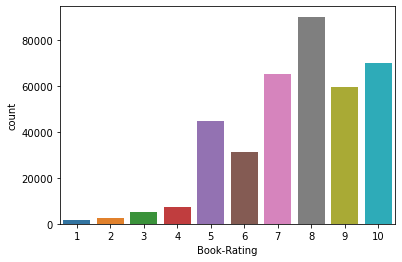

(378023, 10)

In [22]:
#Making a copy of the df  without book rating of zero. 

df2 = df[df['Book-Rating'] != 0]

sns.countplot(data=df2 , x='Book-Rating')
plt.show();

df2.shape

We can observe that the majority of the books that were rated recieved a score of 5 or higher. 

Next we will focus on two different forms of recommendation, one based on popularity. This is the top rated books based on the data, and would serve as a great start for new users. 

In [23]:
rating_counts = df2.groupby('Book-Title').count()['Book-Rating'].reset_index()

rating_counts.rename(columns={'Book-Rating' : 'Total_Ratings'}, inplace=True)

avg_rating = df2.groupby('Book-Title')['Book-Rating'].mean().reset_index()

book_ratings = rating_counts.merge(avg_rating,on='Book-Title')



In [24]:
book_ratings.rename(columns= {'Book-Title': 'Book_Title', 'Book-Rating': 'Avg_Rating'}, inplace=True)

book_ratings.head()

,Book_Title,Total_Ratings,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000


In [25]:
book_ratings.describe()

,Total_Ratings,Avg_Rating
count,133363.000000,133363.000000
mean,2.834542,7.523170
std,9.179767,1.707216
min,1.000000,1.000000
25%,1.000000,6.500000
50%,1.000000,8.000000
75%,2.000000,9.000000
max,707.000000,10.000000


Based on the statistic above I want to take a look at the books in the top 10% This will help me determine a threshold for the number of ratings needed in order to reccommend based on popularity. 

In [26]:
top_10_percent = book_ratings['Total_Ratings'].quantile(0.95)

top_10_percent

8.0

In [27]:
book_ratings = book_ratings[book_ratings['Total_Ratings'] > 8]

book_ratings.sort_values('Avg_Rating',ascending=False).head(25)

,Book_Title,Total_Ratings,Avg_Rating
78192,Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10.000000
28876,Dilbert: A Book of Postcards,13,9.923077
44486,Harry Potter and the Chamber of Secrets Postca...,23,9.869565
54993,Kiss of the Night (A Dark-Hunter Novel),10,9.800000
108105,The Lorax,10,9.800000
83207,Route 66 Postcards: Greetings from the Mother ...,11,9.727273
64728,Maus 1. Mein Vater kotzt Geschichte aus. Die G...,10,9.700000
80602,Ranma 1/2 (Ranma 1/2),10,9.700000
93706,TOLKIEN MAGNETIC POSTCARDS(tm) 12 Full-color M...,9,9.666667
113168,"The Return of the King (The Lord of The Rings,...",16,9.625000


Due to such a low number of rating in the top 10%. I will weight the average ratings in order instead of picking an amount of ratings needed. 

In [28]:
book_ratings['Weighted_Avg'] = ((book_ratings['Avg_Rating'] * book_ratings['Total_Ratings'])/book_ratings['Total_Ratings'].sum()) * 100

book_ratings.sort_values('Weighted_Avg',ascending=False).head(10)

,Book_Title,Total_Ratings,Avg_Rating,Weighted_Avg
108282,The Lovely Bones: A Novel,707,8.185290,3.515305
100777,The Da Vinci Code,494,8.439271,2.532453
114236,The Secret Life of Bees,406,8.477833,2.090838
113004,The Red Tent (Bestselling Backlist),383,8.182768,1.903744
109999,The Nanny Diaries: A Novel,393,7.437659,1.775572
44483,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,1.750667
15531,Bridget Jones's Diary,377,7.625995,1.746415
44512,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,1.709968
59409,Life of Pi,336,8.080357,1.649223
3034,A Painted House,366,7.398907,1.644971


Collabrotive Filtering Based Recommeneder

In [29]:
#Count number of review from each user.
raw_counts = df2['User-ID'].value_counts()

# Filter counts where value is over 50 
counts = raw_counts[raw_counts > 50]

counts.describe()


count    1137.000000
mean      131.631486
std       288.973996
min        51.000000
25%        64.000000
50%        83.000000
75%       129.000000
max      6782.000000
Name: User-ID, dtype: float64

In [30]:
collab_ratings = df2[df2['User-ID'].map(df2['User-ID'].value_counts()) > 100] 
collab_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating,Location,Age
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",35
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",35
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,11676,8,"n/a, n/a, n/a",35
84,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",35
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,11676,8,"n/a, n/a, n/a",35


In [31]:
pivot_table = collab_ratings.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)
pivot_table.head()

User-ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000104687X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001047213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001047973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000104799X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pivot_table)

In [35]:
def recommender(title):
    ISBN = df2.loc[df2['Book-Title'] == title, 'ISBN'].iloc[0]
    index = np.where(pivot_table.index==ISBN)[0][0]
    items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    book_recs = []
    for i in items: 
        item = df2.loc[df2['ISBN'] == pivot_table.index[i[0]], 'Book-Title'].iloc[0]
        book_recs.append(item)
        
    return book_recs

In [36]:
recommender('Empire Falls')

["Plane Insanity: A Flight Attendant's Tales of Sex, Rage, and Queasiness at 30,000 Feet",
 'The Wind-Up Bird Chronicle',
 'Blood Work',
 'Tipping the Velvet',
 "Anna's Book"]

In [37]:
recommender('Harry Potter Und Der Feuerkelch')

['The Legacy of Luna: The Story of a Tree, a Woman and the Struggle to Save the Redwoods',
 'Balthazar (Durrell, Lawrence. Alexandria Quartet.)',
 'The Runaway Summer (Puffin Books)',
 'Selected Poems (Penguin Classics)',
 'David Copperfield (Penguin Popular Classics)']

In [40]:
recommender('Harry Potter and the Chamber of Secrets (Book 2)')

["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 "Roger Caras' Treasury of Great Cat Stories",
 'Dark Debts']